In [1]:

import numpy as np
import pandas  as pd
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestClassifier

from pylab import rcParams
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [2]:
#loading the dataset into the Jupyter environment
train = pd.read_csv('C:/Users/HP/Desktop/digit reco/mnist_train.csv',header = None)
test = pd.read_csv('C:/Users/HP/Desktop/digit reco/mnist_test.csv',header = None )
data = [train,test]

In [3]:
#Verifying the dataset by showing the (nxp)
train.head()
test[:10]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Data processing
X_train = train.loc[:,1:]
y_train = train.loc[:,0]
X_test = test.loc[:,1:]
y_test = test.loc[:,0]

X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values



In [5]:
X_train_p = X_train_array.reshape(-1,28,28,1)
X_test_p = X_test_array.reshape(-1,28,28,1)

Label: 1


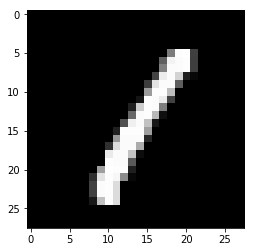

In [6]:
index=3
print("Label: " + str(y_train[index]))
plt.imshow(X_train_p[index].reshape((28,28)),cmap='gray')
plt.show()

In [7]:
#check for the missing values

X_train.isnull().any().describe()
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

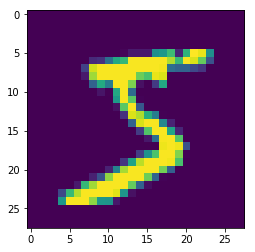

In [8]:
ex=plt.imshow(X_train_p[0][:,:,0])

In [9]:
#Spiliting the dataset into training and testing
random_seed =10
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size = 0.1, random_state=random_seed)


In [10]:
#using a random classifier with a entropy criterion 
rf=RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rf1=RandomForestClassifier(n_estimators=20, criterion="entropy")
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rf2=RandomForestClassifier(n_estimators=50, criterion="entropy")
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rf3=RandomForestClassifier(n_estimators=75, criterion="entropy")
rf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#Making predictions with the classifier
pred=rf.predict(X_test)
pred1=rf1.predict(X_test)
pred2=rf2.predict(X_test)
pred3=rf3.predict(X_test)


In [16]:
pred

array([3, 5, 0, ..., 5, 2, 3], dtype=int64)

In [22]:
#Exploring the confusion matrix to validate the level of correctly predicted digits
from sklearn.metrics import confusion_matrix


test_predictions = rf.predict(X_test)
confusion = confusion_matrix(y_test, test_predictions)
print(confusion)

[[547   0   0   0   0   1   2   0   3   1]
 [  0 673   4   1   1   0   0   1   0   0]
 [  4   2 606   2   1   0   0   5   3   1]
 [  2   2   9 540   0   6   0   2  10   2]
 [  0   1   0   0 576   0   4   2   0  12]
 [  4   0   1   7   2 544   2   0   3   2]
 [  2   0   1   0   1   0 574   0   1   0]
 [  1   2   7   0   7   0   0 667   3   7]
 [  1   5   3   4   1   2   5   2 553   4]
 [  1   1   1   6   7   2   0   3   5 530]]


In [23]:
test_predictions1 = rf1.predict(X_test)
confusion = confusion_matrix(y_test, test_predictions1)
print(confusion)

[[544   0   1   1   0   2   2   1   3   0]
 [  0 673   5   1   1   0   0   0   0   0]
 [  3   2 605   4   0   1   1   5   2   1]
 [  1   0   7 541   1   6   0   3  12   2]
 [  0   1   0   1 572   0   5   2   1  13]
 [  4   2   1  11   2 534   3   0   5   3]
 [  1   0   2   0   2   6 565   0   3   0]
 [  2   2  10   3   4   1   0 661   3   8]
 [  3   6   6   7   3   4   7   1 535   8]
 [  0   1   1   7  11   2   0   6   6 522]]


In [24]:
test_predictions2 = rf2.predict(X_test)
confusion = confusion_matrix(y_test, test_predictions2)
print(confusion)

[[550   0   0   0   0   1   1   0   2   0]
 [  0 673   4   1   1   0   0   1   0   0]
 [  4   2 600   4   2   0   2   5   4   1]
 [  2   1   8 536   0   8   0   2  11   5]
 [  0   1   0   0 578   0   4   1   0  11]
 [  4   0   0  12   2 539   2   0   3   3]
 [  3   0   1   0   1   0 572   0   2   0]
 [  1   3   7   0   5   0   1 666   2   9]
 [  1   6   4   2   5   3   5   1 549   4]
 [  0   1   1   6   4   4   0   5   3 532]]


In [25]:
test_predictions3 = rf3.predict(X_test)
confusion = confusion_matrix(y_test, test_predictions3)
print(confusion)

[[549   0   0   0   0   1   2   0   2   0]
 [  0 673   5   1   1   0   0   0   0   0]
 [  4   2 601   5   2   0   0   6   2   2]
 [  1   0   8 547   0   5   1   3   6   2]
 [  0   1   0   0 577   1   4   1   1  10]
 [  4   0   1   9   2 540   3   0   4   2]
 [  1   0   2   0   1   1 573   0   1   0]
 [  2   2   7   1   5   0   0 668   1   8]
 [  1   2   4   4   2   3   4   1 555   4]
 [  1   1   2   7   5   2   0   5   4 529]]


In [98]:
#Cross validation

random_seed =10

from sklearn.model_selection import cross_validate

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train,y_train, test_size = 0.1,random_state=random_seed)
model = RandomForestClassifier(n_estimators=100, criterion="entropy")
model.fit(X_train, y_train)
ypred = model.predict(X_test)



In [99]:
print(ypred)

[3 5 0 ... 5 2 3]


In [100]:
errors = (ypred - y_test != 0)
print(errors)

4883     False
28477    False
8527     False
38347    False
3363     False
36370    False
6083     False
34418    False
18938    False
17773    False
56040    False
38816    False
6682     False
17769    False
47682    False
23600    False
34795    False
53244    False
21836    False
51265    False
3404     False
52886     True
50380    False
32901    False
15058    False
8219     False
41498    False
6244     False
58797    False
20758    False
         ...  
54479    False
41282    False
1604      True
23731    False
56600     True
42379    False
31737    False
43488    False
4463     False
9579     False
48016    False
53985    False
45874    False
20675    False
36798    False
51449    False
45833    False
4009     False
11335    False
11278    False
1440     False
31705    False
22600    False
11549    False
10760    False
44647    False
45900    False
20033    False
41204    False
48076    False
Name: 0, Length: 6000, dtype: bool


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.9681666666666666

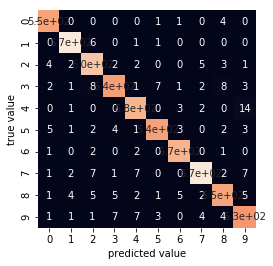

In [91]:

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, test_predictions)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [107]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error =(y_test, ypred)
print(mean_absolute_error)

(4883     3
28477    5
8527     0
38347    6
3363     6
36370    9
6083     1
34418    1
18938    5
17773    6
56040    2
38816    0
6682     1
17769    4
47682    7
23600    6
34795    2
53244    5
21836    5
51265    0
3404     3
52886    7
50380    7
32901    2
15058    4
8219     1
41498    5
6244     1
58797    4
20758    8
        ..
54479    1
41282    1
1604     4
23731    3
56600    8
42379    5
31737    9
43488    5
4463     6
9579     1
48016    5
53985    4
45874    8
20675    3
36798    6
51449    4
45833    0
4009     0
11335    0
11278    1
1440     4
31705    6
22600    6
11549    5
10760    3
44647    5
45900    1
20033    5
41204    2
48076    3
Name: 0, Length: 6000, dtype: int64, array([3, 5, 0, ..., 5, 2, 3], dtype=int64))


In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error =(y_test, ypred)
print(mean_squared_error)

(4883     3
28477    5
8527     0
38347    6
3363     6
36370    9
6083     1
34418    1
18938    5
17773    6
56040    2
38816    0
6682     1
17769    4
47682    7
23600    6
34795    2
53244    5
21836    5
51265    0
3404     3
52886    7
50380    7
32901    2
15058    4
8219     1
41498    5
6244     1
58797    4
20758    8
        ..
54479    1
41282    1
1604     4
23731    3
56600    8
42379    5
31737    9
43488    5
4463     6
9579     1
48016    5
53985    4
45874    8
20675    3
36798    6
51449    4
45833    0
4009     0
11335    0
11278    1
1440     4
31705    6
22600    6
11549    5
10760    3
44647    5
45900    1
20033    5
41204    2
48076    3
Name: 0, Length: 6000, dtype: int64, array([3, 5, 0, ..., 5, 2, 3], dtype=int64))


In [109]:
from sklearn.metrics import r2_score
r2_score =(y_test, ypred)
print(r2_score)

(4883     3
28477    5
8527     0
38347    6
3363     6
36370    9
6083     1
34418    1
18938    5
17773    6
56040    2
38816    0
6682     1
17769    4
47682    7
23600    6
34795    2
53244    5
21836    5
51265    0
3404     3
52886    7
50380    7
32901    2
15058    4
8219     1
41498    5
6244     1
58797    4
20758    8
        ..
54479    1
41282    1
1604     4
23731    3
56600    8
42379    5
31737    9
43488    5
4463     6
9579     1
48016    5
53985    4
45874    8
20675    3
36798    6
51449    4
45833    0
4009     0
11335    0
11278    1
1440     4
31705    6
22600    6
11549    5
10760    3
44647    5
45900    1
20033    5
41204    2
48076    3
Name: 0, Length: 6000, dtype: int64, array([3, 5, 0, ..., 5, 2, 3], dtype=int64))


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       554
           1       0.98      0.99      0.98       680
           2       0.95      0.97      0.96       624
           3       0.97      0.95      0.96       573
           4       0.97      0.96      0.97       595
           5       0.97      0.96      0.96       565
           6       0.98      0.99      0.98       579
           7       0.98      0.96      0.97       694
           8       0.95      0.95      0.95       580
           9       0.95      0.96      0.95       556

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [19]:
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
prediction_validation = clf.predict(X_test)
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy: 0.947


Predicted 6


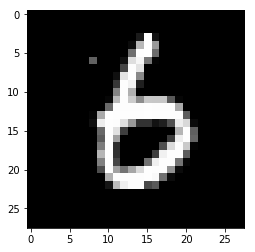

In [29]:
#test for digits prediction from the test dataset
prediction_test = clf.predict(X_test)
print("Predicted " + str(prediction_test[index]))
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')